In [11]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

### Importing the data

In [2]:
data = pd.read_csv('cleaned_loan.csv')

In [3]:
data.drop('Unnamed: 0',inplace=True,axis=1)

**SEGGREAGATING DEPENDENT AND INDEPENDENT VARIABLES**

In [4]:
#seperating independent and dependent variables
x=data.drop('good_bad_flag',axis=1)
y=data['good_bad_flag'].replace({'Good':0, 'Bad':1})

**SPLITTING DATA INTO TRAIN AND TEST**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.2, stratify=y)


#Scalig the train and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Importing KNN

In [6]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking Consistency , using Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 4), X = x_train, y = y_train, cv = 10,scoring='f1')
score

# try a 5 -fold CV or a 7-fold CV

array([0.16842105, 0.20560748, 0.2244898 , 0.16494845, 0.20408163,
       0.14736842, 0.14583333, 0.25490196, 0.28282828, 0.10989011])

In [8]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(19.0837051933544, 5.072745921318385)

### Automating the process of cross validation for different K-Neighbors

In [11]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score(KNN(n_neighbors = i) , X = x_train, y = y_train, cv = 5,scoring='f1')
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [12]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

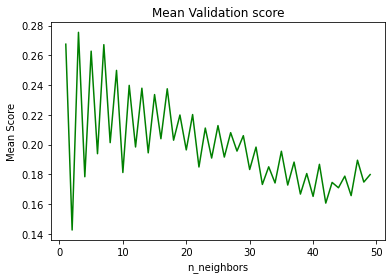

In [13]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Plotting Standard Deviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

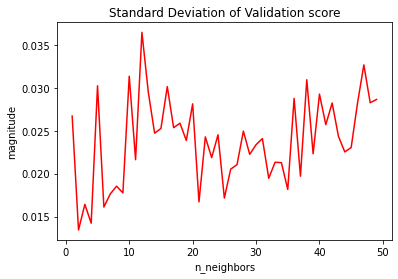

In [14]:
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [10]:
clf = KNN(n_neighbors =4)
clf.fit(x_train, y_train)


score1 = clf.score(x_train, y_train)

score = clf.score(x_test, y_test)
score, score1

(0.7688787185354691, 0.8196908986834573)

In [14]:
# Creating instance of KNN
clf = KNN(n_neighbors = 9)

# Fitting the model
clf.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(x_test)
k = f1_score(test_predict, y_test)
print('Test F1 Score    ', k )


train_predict=clf.predict(x_train)
k1=f1_score(train_predict,y_train)
print('Train F1 score',k1)

Test F1 Score     0.25702811244979923
Train F1 score 0.33203883495145625
